In [2]:
#inmorting libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
import plotly.graph_objs 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [18]:
#loading data
Bank  = pd.read_csv('C:/Users/OM/Desktop/Bank full.csv')
print(Bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Age Group'],
      dtype='object')


#preprocessing


In [10]:
#chicking for null values
Bank.isna().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
Age Group    0.0
dtype: float64

In [7]:
#chicking for duplicates
Bank.duplicated().mean()


0.0

In [9]:
Bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
Age Group    object
dtype: object

In [14]:
#descriptive statistics
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: >

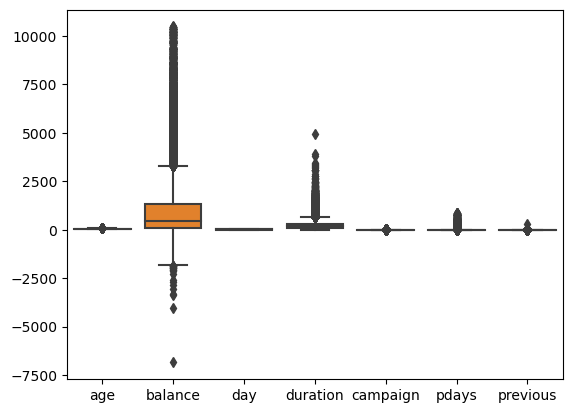

In [24]:
sns.boxplot(Bank)

In [30]:
#treatment of outliers

In [45]:
import pickle,joblib

def treat_outliers(Bank):
    q3 = np.percentile(Bank,75)
    q1 = np.percentile(Bank,25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    for i in range(0,len(Bank)):
        if Bank[i] > upper:
            Bank[i] = upper
        elif Bank[i] < lower:
            Bank[i] = lower
    return Bank
    
    


In [46]:
joblib.dump(treat_outliers,"treat_outliers.pkl")
treat_outliers_pkl = joblib.load('treat_outliers.pkl')

    

<Axes: >

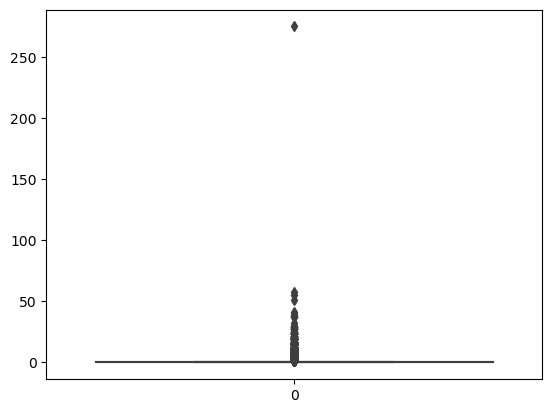

In [47]:
ind_out = 14
sns.boxplot(Bank.iloc[::,ind_out])

In [52]:
#unique values
columns = Bank.columns
for i in range(0,len(columns)):
    print("The unique values and their count in column",columns[i])
    print(Bank.iloc[::,i].value_counts())
    print("="*50)

The unique values and their count in column age
32    1997
31    1912
33    1904
34    1856
35    1840
      ... 
95       2
92       2
93       2
88       2
94       1
Name: age, Length: 77, dtype: int64
The unique values and their count in column job
blue-collar      9440
management       8840
technician       7272
admin.           5022
services         4042
retired          2128
self-employed    1486
entrepreneur     1414
unemployed       1222
housemaid        1190
student           902
unknown           269
Name: job, dtype: int64
The unique values and their count in column marital
married     25946
single      12250
divorced     5031
Name: marital, dtype: int64
The unique values and their count in column education
secondary    22432
tertiary     12447
primary       6586
unknown       1762
Name: education, dtype: int64
The unique values and their count in column default
no     42415
yes      812
Name: default, dtype: int64
The unique values and their count in column balance
 0     

C:\Users\OM\AppData\Local\Temp\ipykernel_9780\1418608888.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



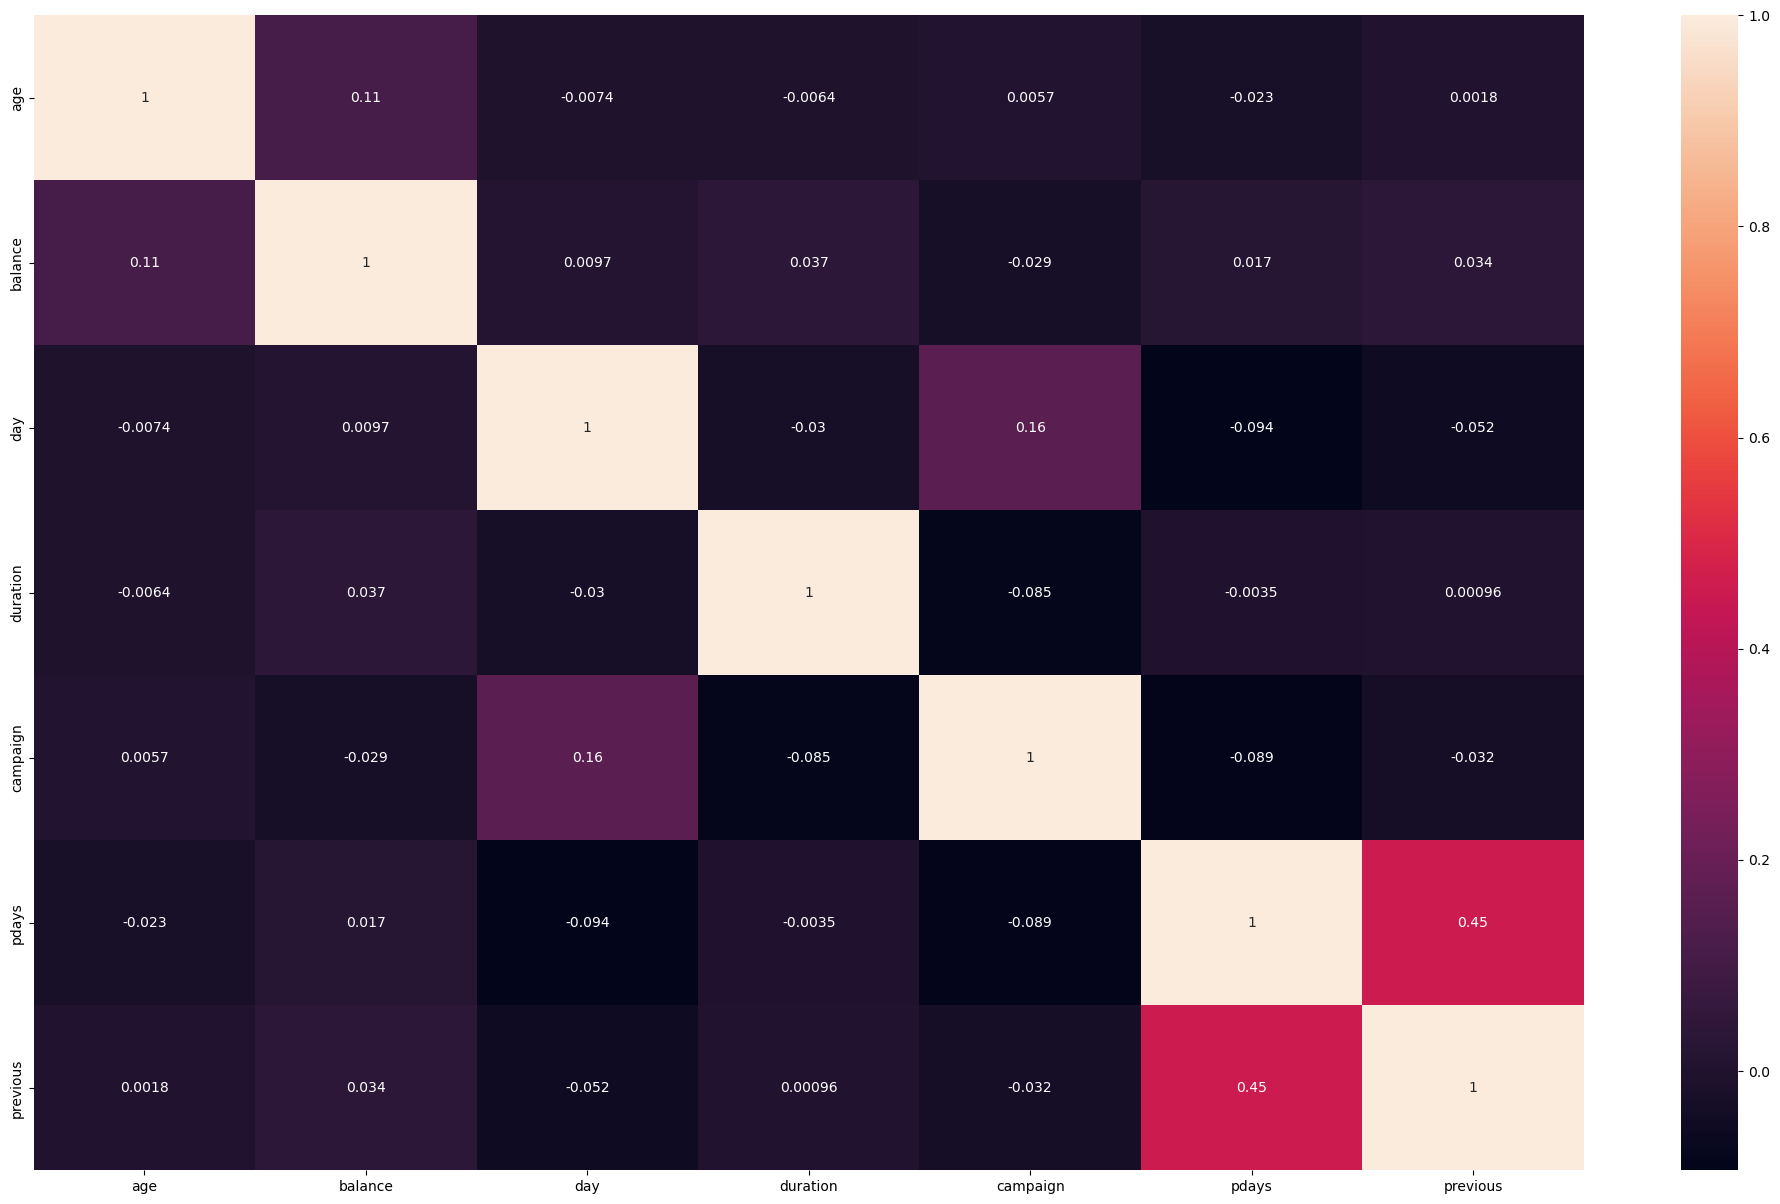

In [53]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(Bank.corr(),annot=True)
plt.show()

                                      Modeling

In [61]:
def train_test(x,y,test_size):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=1234)
    for i in x_train,x_test,y_train,y_test:
        print(i.shape)
    return x_train,x_test,y_train,y_test
print("Train and test data is being splitted...")

Train and test data is being splitted...


In [62]:
joblib.dump(train_test,"train_test_split.pkl")

['train_test_split.pkl']

In [64]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
# Encoding the variable
Bank = Bank.apply(lambda lb: d[lb.name].fit_transform(lb))

# Inverse the encoded
#fit = fit.apply(lambda lb: d[lb.name].inverse_transform(lb))
# Using the dictionary to label future data
#fit = fit.apply(lambda lb: d[lb.name].inverse_transform(lb))
#fit
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Age Group
0,40,4,1,2,0,3034,1,0,2,4,8,261,0,0,0,3,0,1
1,26,9,2,1,0,943,1,0,2,4,8,151,0,0,0,3,0,0
2,15,2,1,1,0,916,1,1,2,4,8,76,0,0,0,3,0,0
3,29,1,1,3,0,2418,1,0,2,4,8,92,0,0,0,3,0,0
4,15,11,2,3,0,915,0,0,2,4,8,198,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1739,0,0,0,16,9,972,2,0,0,3,1,1
45207,53,5,0,0,0,2637,0,0,0,16,9,456,1,0,0,3,1,1
45208,54,5,1,1,0,5453,0,0,0,16,9,1112,4,181,3,2,1,1
45209,39,1,1,1,0,1582,0,0,1,16,9,508,3,0,0,3,0,1


In [65]:
#EDA in ONE html file
import pandas_profiling as pp
profile = pp.ProfileReport(Bank)
profile.to_file('Bank_EDA.html')

C:\Users\OM\AppData\Local\Temp\ipykernel_9780\1950263973.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                            Modeling

In [149]:
x = Bank.drop(columns=['y'])
y = Bank['y']

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
print(y_pred)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)







[0 0 0 ... 0 0 0]
Accuracy: 0.8863058061531344
Confusion Matrix:
 [[7482  165]
 [ 818  181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7647
           1       0.52      0.18      0.27       999

    accuracy                           0.89      8646
   macro avg       0.71      0.58      0.60      8646
weighted avg       0.86      0.89      0.86      8646



C:\Users\OM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Decision tree

In [151]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

x = Bank.drop(columns=['y'])
y = Bank['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)




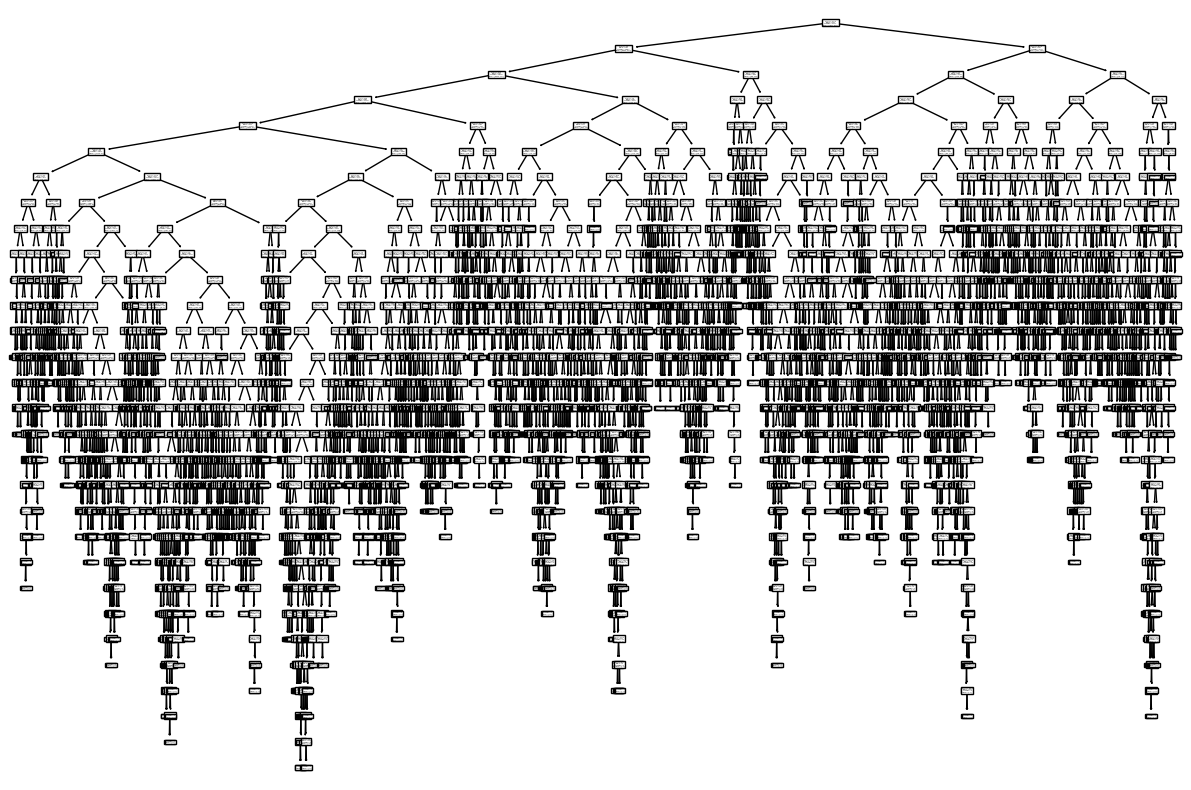

In [152]:
DT_model = DecisionTreeClassifier(criterion='gini')
DT_model.fit(x_train,y_train)
plt.figure(figsize=(15, 10))
plot_tree(DT_model)
plt.show()

In [153]:
DT_pred = DT_model.predict(x_test)
DT_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
# Evaluate the model
accuracy = accuracy_score(y_test, DT_pred)
conf_matrix = confusion_matrix(y_test, DT_pred)
classification_rep = classification_report(y_test, DT_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8691880638445524
Confusion Matrix:
 [[6992  620]
 [ 511  523]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7612
           1       0.46      0.51      0.48      1034

    accuracy                           0.87      8646
   macro avg       0.69      0.71      0.70      8646
weighted avg       0.88      0.87      0.87      8646



In [ ]:
# RandomForestClassifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(criterion='gini')
RF_model.fit(x_train,y_train)


RF_pred = RF_model.predict(x_test)
RF_pred

# Evaluate the model
accuracy = accuracy_score(y_test, DT_pred)
conf_matrix = confusion_matrix(y_test, DT_pred)
classification_rep = classification_report(y_test, DT_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8691880638445524
Confusion Matrix:
 [[6992  620]
 [ 511  523]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7612
           1       0.46      0.51      0.48      1034

    accuracy                           0.87      8646
   macro avg       0.69      0.71      0.70      8646
weighted avg       0.88      0.87      0.87      8646

